# NLP Classification Project

##### Building a spam filter with the kernel framework. 

Emails are either classed as undersired "spam" or "ham". This classification task is applies and uses variants of edit distance within a kernel framework. LibSVM algorithm is then applied to clasify the data as either "ham" or "spam". The <a href = "https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection"> SMS Spam Collection Data Set</a> from UCI machine learning repository is used for the experiment.

* Clean the data
* Carry out data exploration
* split, tokenize, remove punctuation
* Extract features
* Construct kernels
* Run classification 
* Compare and analyse

In [1]:
#Import required files
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
import string
from libsvm.svmutil import *
from util_ker import *
from util_ker import EvaluateTest
from util_Text import *
import seaborn as sns
import time

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

## Explore the Data

In [2]:
#Load Data
data = pd.read_csv("/Users/osita/Documents/GitHub/NLP-classification/data/SMSSpamCollection", sep='\t', header=None,
                   names=['label','Text'])

In [3]:
data.head()

,label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
print('The data is made up of {} examples '.format(data.shape[0]))

The data is made up of 5572 examples 


In [5]:
#Check for null values
data.isnull().sum()

label    0
Text     0
dtype: int64

In [6]:
len_ham  = data[data['label']=='ham'].count()[0]
len_spam = data[data['label']=='spam'].count()[0]

print('{} examples classed as ham with {} examples classed as spam'.format(len_ham, len_spam))

4825 examples classed as ham with 747 examples classed as spam


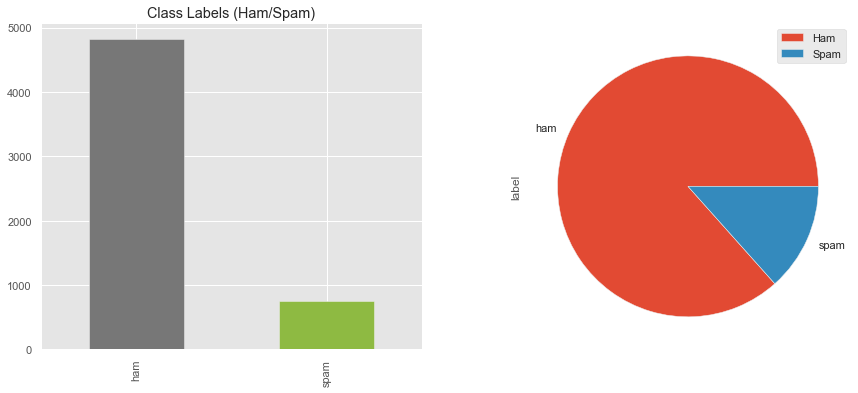

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1);data.label.value_counts().plot(kind='bar',color=['C3','C5']); plt.title('Class Labels (Ham/Spam)')
plt.subplot(1,2,2);data.label.value_counts().plot(kind='pie');plt.legend(['Ham','Spam'])
plt.show()

In [8]:
# View a few examples of the text
data['Text'].values[0:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

In [9]:
#Extract the length of each example
lenData = np.zeros((len(data),1))
for i in range(len(data)):
    lenData[i] = len(data.Text[i])

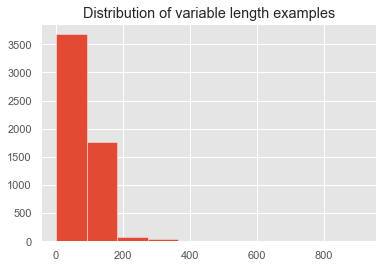

In [10]:
#Plot a histogram showing the distribution of the variable length
plt.hist(lenData);
plt.title('Distribution of variable length examples');

### Uneven length strings

We can easily select an appropriate multivariate analytical tool to tackle statistical pattern recognition problems. The data exists as real valued vectors of equal length. This however becomes a challenge when dealing with uneven length structural pattern recognition tasks. For example this spam detection  problem.

Here we apply the edit distance kernel framework with support vector machines 
 

### Clean Data

 - Remove punctuation
 - Tokenize the strings
 - Remove stop words

In [11]:
data['Text_cleaned'] = data['Text'].apply(lambda x: clean_text(x)) #Applies the function to each row
data.head(10)

,label,Text,Text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[FreeMsg, Hey, darling, 3, weeks, word, back, Id, like, fun, still, Tb, ok, XxX, std, chgs, send..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[Had, mobile, 11, months, U, R, entitled, Update, latest, colour, mobiles, camera, Free, Call, T..."


### Apply Stemming

In [12]:
# ['Porter','Lancaster']
Stemmer = 'Porter'

In [13]:
data['Text_stemmed'] = data['Text_cleaned'].apply(lambda x: stemming(x,Stemmer))
data.head()

,label,Text,Text_cleaned,Text_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


### Lemmatize the data

In [14]:
data['Text_lemmatized'] = data['Text_stemmed'].apply(lambda x: lemmatizing(x))

data.head()

,label,Text,Text_cleaned,Text_stemmed,Text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


### Change labels from ham to -1 and spam to 1

In [15]:
data.replace({'label': {'ham': -1, 'spam': 1}}, inplace=True)

In [16]:
#Checks label counts are still the same
data['label'].value_counts()

-1    4825
 1     747
Name: label, dtype: int64

In [17]:
data.label.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: label, dtype: int64

### Extract predictor variables and target label


We run tests with the **Text_cleaned**, **Text_stemmed** and **Text_lemmatized**

In [18]:
Y = data.label.values.reshape(len(data),1)
X = data.Text_stemmed.values.reshape(len(Y),1)  #data.iloc[:,4].values.shape

In [19]:
X.shape

(5572, 1)

In [20]:
Y.shape

(5572, 1)

In [21]:
# Split data into Training, Test and Validation data sets
xtr, xva, xte, ytr, yva, yte = splitdata(X, Y, 15, 0.8)

4458 training examples and 1 features
557 validation examples and 1 features
557 testing examples and 1 features


In [22]:
num_of_train_pos = ytr[ytr==1].sum()
num_of_val_pos   = yva[yva==1].sum()
num_of_test_pos  = yte[yte==1].sum()
num_of_train_neg = len(ytr) -  ytr[ytr==1].sum()
num_of_val_neg   = len(yva) -  yva[yva==1].sum()
num_of_test_neg  = len(yte) -  yte[yte==1].sum()

In [23]:
print("Training set has {} positive and {} negative labels".format(num_of_train_pos ,num_of_train_neg))
print("Validation set has {} positive and {} negative labels".format(num_of_val_pos,num_of_val_neg))
print("Test set has {} positive and {} negative labels".format(num_of_test_pos,num_of_test_neg))

Training set has 594 positive and 3864 negative labels
Validation set has 79 positive and 478 negative labels
Test set has 74 positive and 483 negative labels


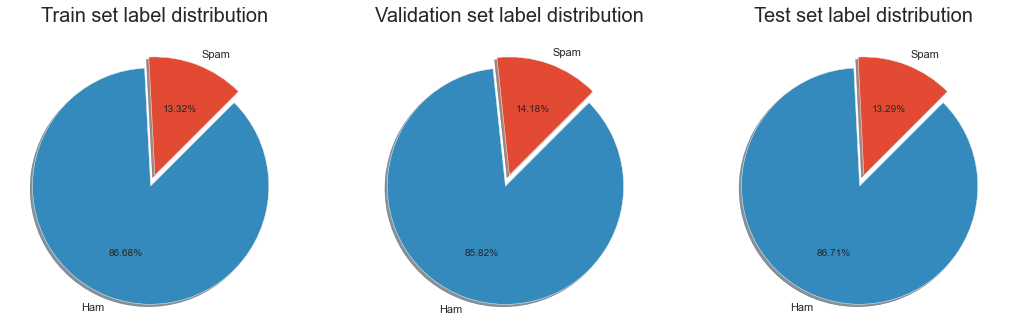

In [24]:
# Initialize the plot
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

Train = [594, 3864]
Val   = [ 79,  478] 
Test  = [ 74,  483]

Labels = ['Spam', 'Ham']
Explode = [0,0.1]

ax1.pie(Train, explode=Explode, labels=Labels,shadow=True,startangle=45,autopct='%1.2f%%');
ax1.set_title('Train set label distribution',fontsize=20);

ax2.pie(Val, explode=Explode, labels=Labels ,shadow=True,startangle=45,autopct='%1.2f%%');
ax2.set_title('Validation set label distribution',fontsize=20);

ax3.pie(Test, explode=Explode, labels=Labels, shadow=True,startangle=45,autopct='%1.2f%%');
ax3.set_title('Test set label distribution',fontsize=20);

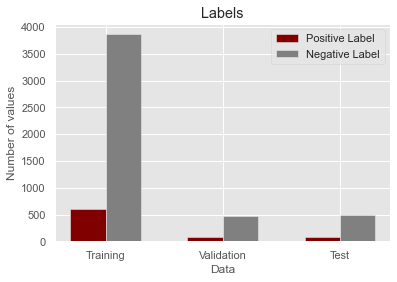

In [25]:
split_data = ['Training', 'Validation','Test']
pos_label  = [num_of_train_pos, num_of_val_pos, num_of_test_pos]
neg_label  = [num_of_train_neg, num_of_val_neg,num_of_test_neg]

index = np.arange(3)
width = 0.30

plt.bar(index,pos_label, width, color='maroon', label='Positive Label')
plt.bar(index+width,neg_label, width, color='grey', label='Negative Label')
plt.title("Labels")

plt.xlabel("Data")
plt.ylabel("Number of values")

plt.xticks(index+width/2, split_data)

plt.legend(loc='best')
plt.show()


# Run Classifiers

In [26]:
kernel = ['editdist','editdist_Levenshtein','editdist_norm_intersect','editdist_norm_max','editdist_norm']
#kernel = ['editdist','editdist_Levenshtein']

In [27]:
#Set Kernel parameter
params = {}
params['editdist']                = [1]
params['editdist_Levenshtein']    = [1]
params['editdist_norm_intersect'] = [1]
params['editdist_norm_max']       = [1]
params['editdist_norm']           = [1]

The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 16.713% (93/557) (classification)
--> The total of 557 predicted with only 84 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 66
Actual label is False while we predicted True - False Positive 465
Actual label is True while we predicted False - False Negative 8
Actual label is False while we predicted False - True Negatve 18

--> 531 positive outcomes predicted
--> 26 negative outcomes predicted
--> An accuracy of 15.08 % was achieved
--> Sensitity of 0.89 was achieved
--> Specificity of 0.04 was achieved 
--> 0.95 rate of positive prediction
--> 0.05 rate of negative prediction
--> 0.11 false negative rate was achieved
--> 0.96 false positve rate (fallout) was achieved
--> Negative predictive value of 0.69
--> Recall value 0f 0.89 achieved
--> The precision vaue of 0.12 achieved
--> An Fscore of 0.21 achieved


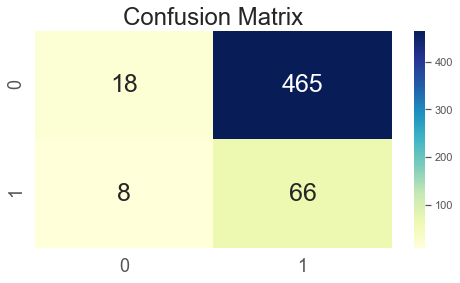

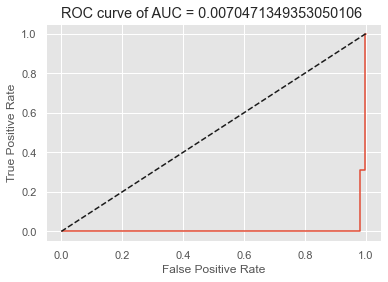

--> An AUC value of 0.0070471349353050106 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.3191% (481/557) (classification)
--> The total of 557 predicted with only 480 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 3
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 480

Fscore cannot be calculated as denominator is 0
--> 3 positive outcomes predicted
--> 554 negative outcomes predicted
--> An accuracy of 86.18 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 0.99 was achieved 
--> 0.01 rate of positive prediction
--> 0.99 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.01 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall value 0f 0.0 achieved
--> The precision

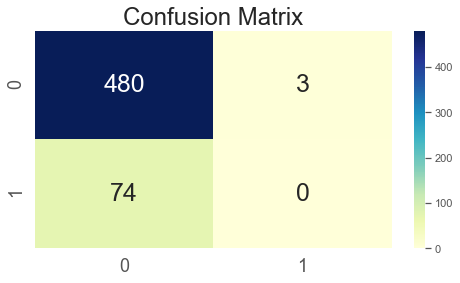

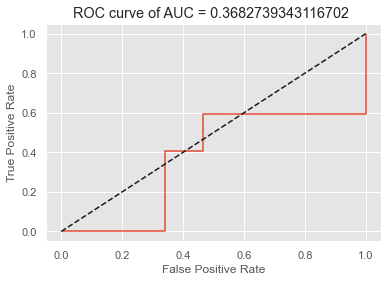

--> An AUC value of 0.3682739343116702 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 14.9992% (84/557) (classification)
--> The total of 557 predicted with only 73 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 67
Actual label is False while we predicted True - False Positive 477
Actual label is True while we predicted False - False Negative 7
Actual label is False while we predicted False - True Negatve 6

--> 544 positive outcomes predicted
--> 13 negative outcomes predicted
--> An accuracy of 13.11 % was achieved
--> Sensitity of 0.91 was achieved
--> Specificity of 0.01 was achieved 
--> 0.98 rate of positive prediction
--> 0.02 rate of negative prediction
--> 0.09 false negative rate was achieved
--> 0.99 false positve rate (fallout) was achieved
--> Negative predictive value of 0.46
--> Recall value 0f 0.91 achieved
--> The precision vaue of 0.12 achieved
--> An Fscore of 0.21 achi

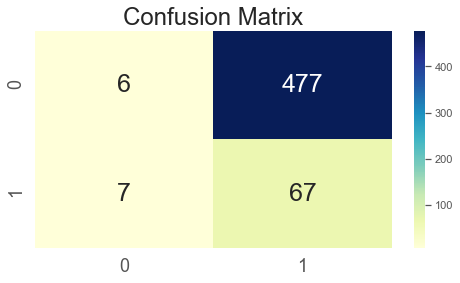

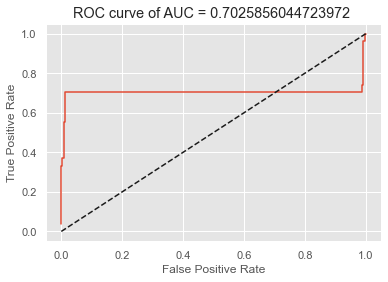

--> An AUC value of 0.7025856044723972 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 58.8985% (328/557) (classification)
--> The total of 557 predicted with only 292 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 10
Actual label is False while we predicted True - False Positive 201
Actual label is True while we predicted False - False Negative 64
Actual label is False while we predicted False - True Negatve 282

--> 211 positive outcomes predicted
--> 346 negative outcomes predicted
--> An accuracy of 52.42 % was achieved
--> Sensitity of 0.14 was achieved
--> Specificity of 0.58 was achieved 
--> 0.38 rate of positive prediction
--> 0.62 rate of negative prediction
--> 0.86 false negative rate was achieved
--> 0.42 false positve rate (fallout) was achieved
--> Negative predictive value of 0.82
--> Recall value 0f 0.14 achieved
--> The precision vaue of 0.05 achieved
--> An Fscore of 0.0

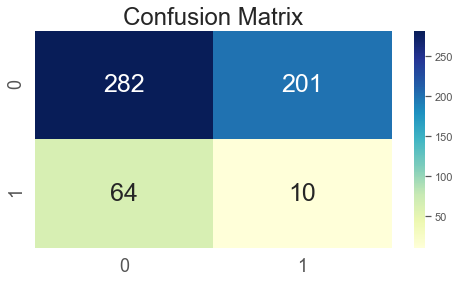

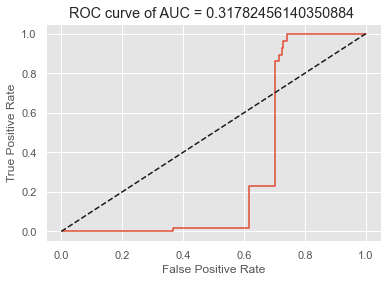

--> An AUC value of 0.31782456140350884 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 15.5266% (86/557) (classification)
--> The total of 557 predicted with only 73 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 65
Actual label is False while we predicted True - False Positive 475
Actual label is True while we predicted False - False Negative 9
Actual label is False while we predicted False - True Negatve 8

--> 540 positive outcomes predicted
--> 17 negative outcomes predicted
--> An accuracy of 13.11 % was achieved
--> Sensitity of 0.88 was achieved
--> Specificity of 0.02 was achieved 
--> 0.97 rate of positive prediction
--> 0.03 rate of negative prediction
--> 0.12 false negative rate was achieved
--> 0.98 false positve rate (fallout) was achieved
--> Negative predictive value of 0.47
--> Recall value 0f 0.88 achieved
--> The precision vaue of 0.12 achieved
--> An Fscore of 0.21 ach

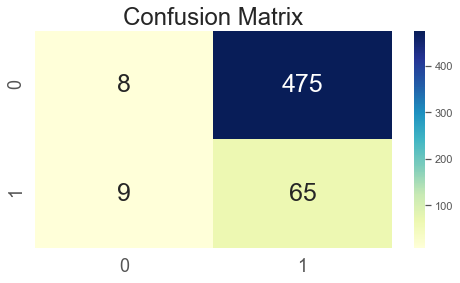

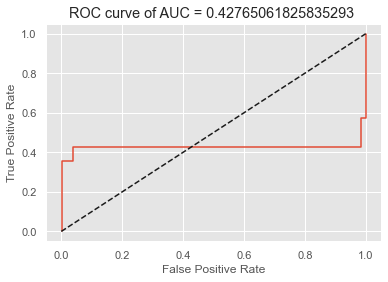

--> An AUC value of 0.42765061825835293 achieved


In [28]:
Exp_1 = fitkernelmodel(xtr, xte, ytr, yte, kernel, params)

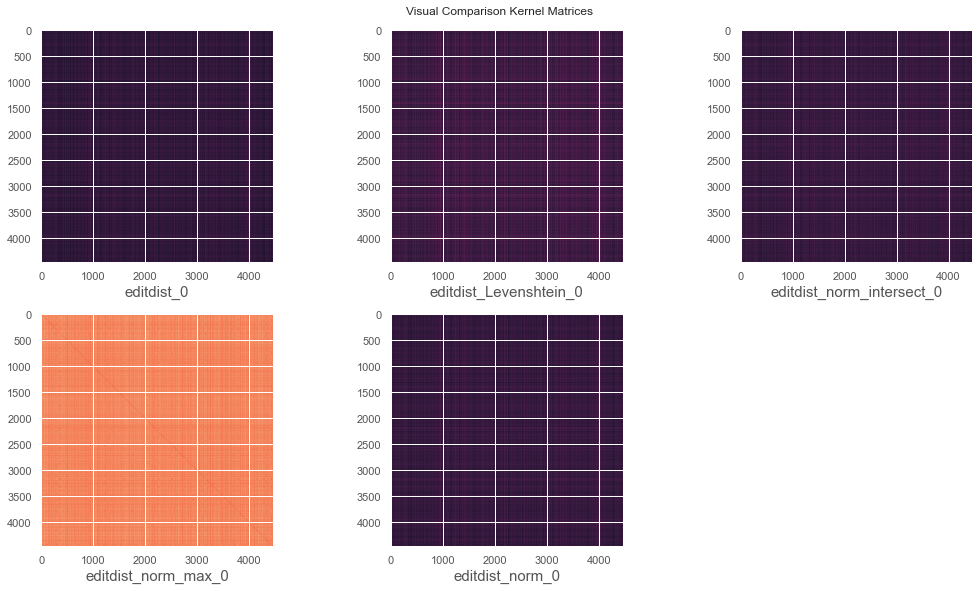

                           Pos  Neg   Accu   Sen  Spec   RPP   RNP  Miss  \
editdist_0                 531   26  15.08  0.89  0.04  0.95  0.05  0.11   
editdist_Levenshtein_0       3  554  86.18  0.00  0.99  0.01  0.99  1.00   
editdist_norm_intersect_0  544   13  13.11  0.91  0.01  0.98  0.02  0.09   
editdist_norm_max_0        211  346  52.42  0.14  0.58  0.38  0.62  0.86   
editdist_norm_0            540   17  13.11  0.88  0.02  0.97  0.03  0.12   

                           Fall   NPV  Recall  Precision  Fscore  
editdist_0                 0.96  0.69    0.89       0.12    0.21  
editdist_Levenshtein_0     0.01  0.87    0.00       0.00    0.00  
editdist_norm_intersect_0  0.99  0.46    0.91       0.12    0.21  
editdist_norm_max_0        0.42  0.82    0.14       0.05    0.07  
editdist_norm_0            0.98  0.47    0.88       0.12    0.21  
                          train_kernel_time test_kernel_time diag_Dominance  \
editdist_0                           5729.9          745.936  

In [29]:
Perf_1, Analysisdf_1 = Analyse_Results(Exp_1)

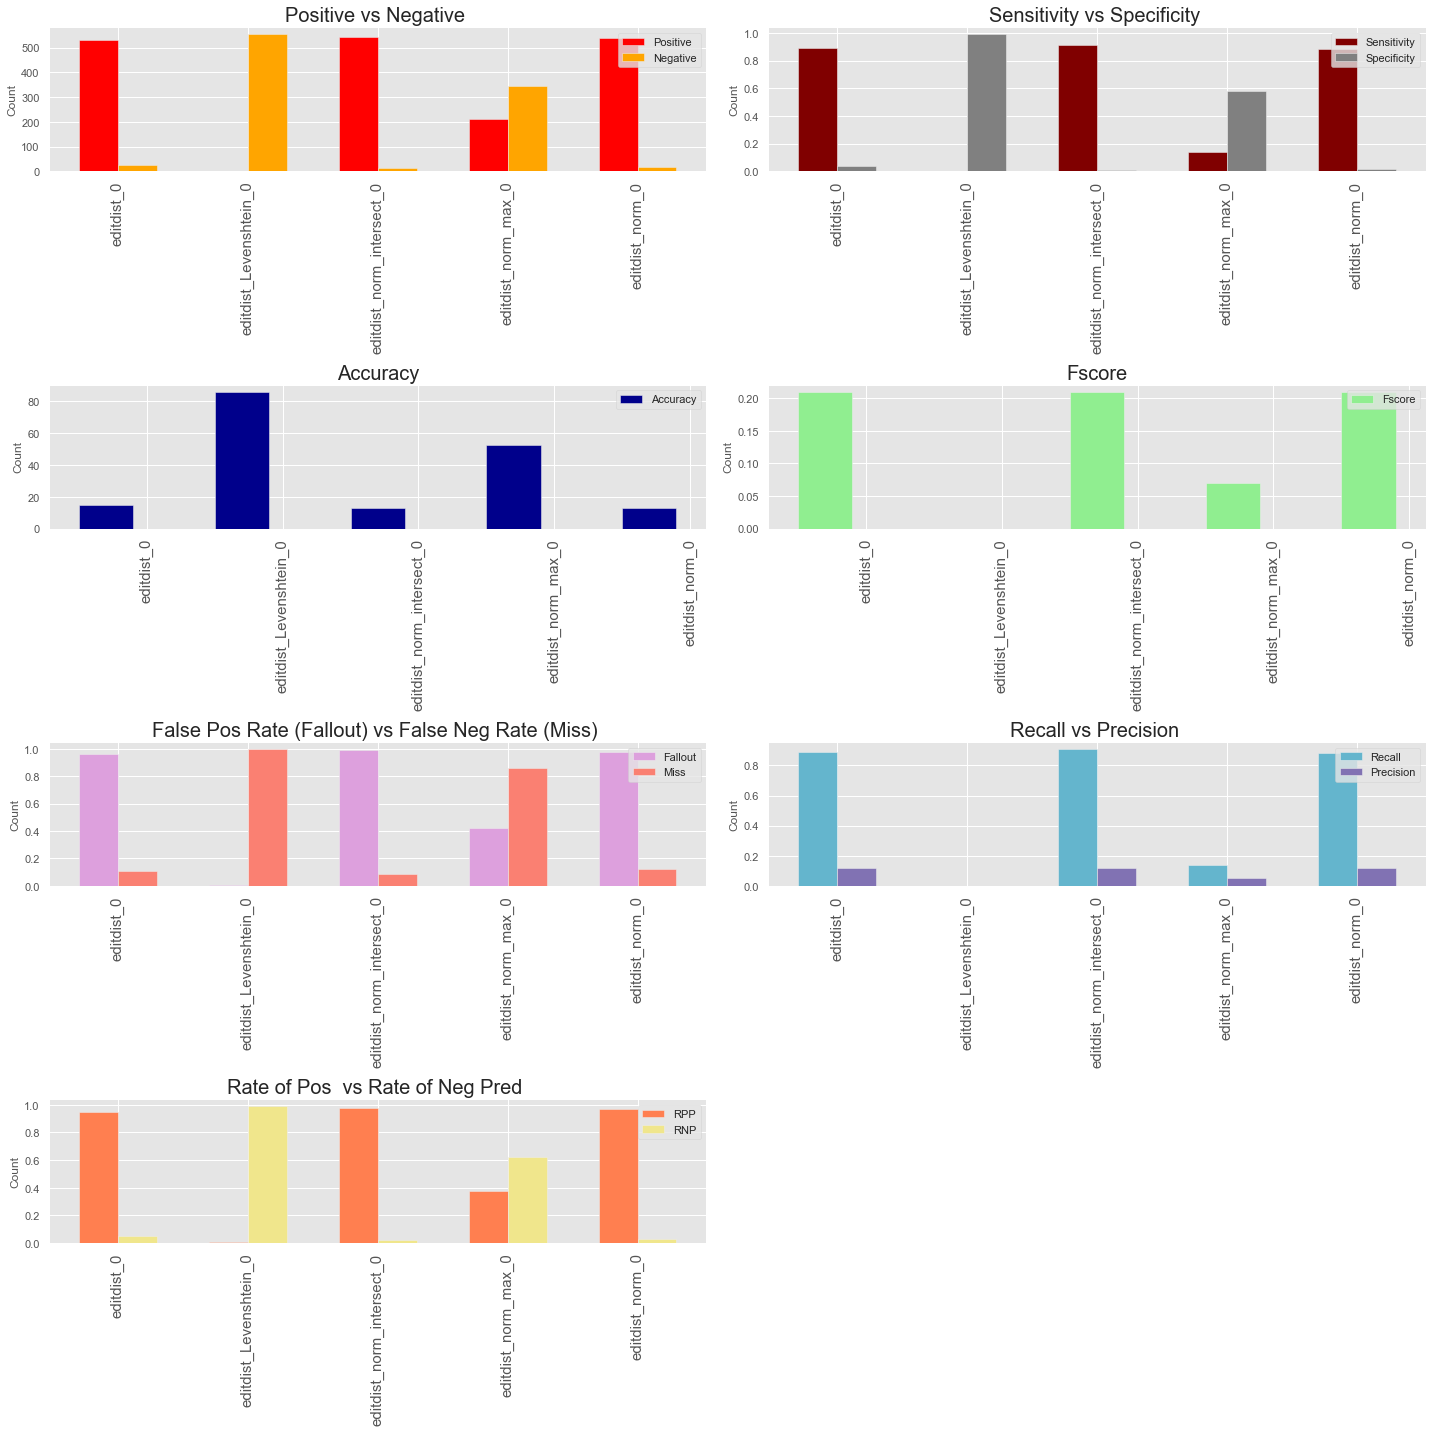

In [30]:
plotResult(Perf_1)

In [31]:
kernel = ['edist','edist_L','edist_n','edist_m','edist_i']

In [32]:
#Set Kernel parameter
params = {}
params['edist']   = [1]
params['edist_L'] = [1]
params['edist_i'] = [1]
params['edist_m'] = [1]
params['edist_n'] = [1]

The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall value 0f 0.0 

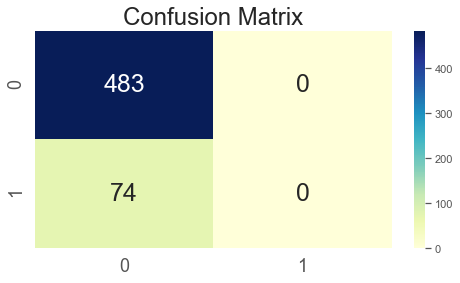

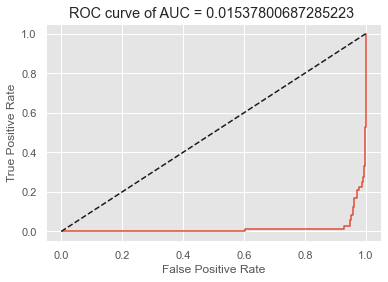

--> An AUC value of 0.01537800687285223 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is valid and PSD
Accuracy = 75.7727% (422/557) (classification)
--> The total of 557 predicted with only 444 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 22
Actual label is False while we predicted True - False Positive 61
Actual label is True while we predicted False - False Negative 52
Actual label is False while we predicted False - True Negatve 422

--> 83 positive outcomes predicted
--> 474 negative outcomes predicted
--> An accuracy of 79.71 % was achieved
--> Sensitity of 0.3 was achieved
--> Specificity of 0.87 was achieved 
--> 0.15 rate of positive prediction
--> 0.85 rate of negative prediction
--> 0.7 false negative rate was achieved
--> 0.13 false positve rate (fallout) was achieved
--> Negative predictive value of 0.89
--> Recall value 0f 0.3 achieved
--> The precision vaue of 0.27

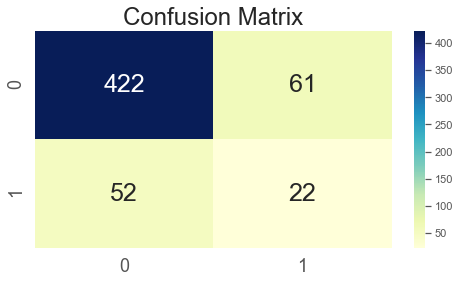

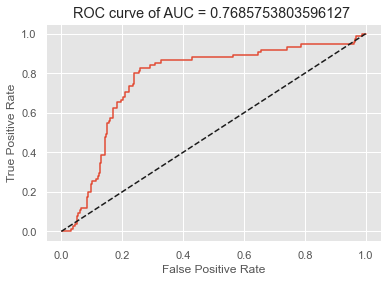

--> An AUC value of 0.7685753803596127 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is valid and PSD
Accuracy = 75.3772% (420/557) (classification)
--> The total of 557 predicted with only 397 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 86
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 397

Fscore cannot be calculated as denominator is 0
--> 86 positive outcomes predicted
--> 471 negative outcomes predicted
--> An accuracy of 71.27 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 0.82 was achieved 
--> 0.15 rate of positive prediction
--> 0.85 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.18 false positve rate (fallout) was achieved
--> Negative predictive value of 0.84
--> Recall value 

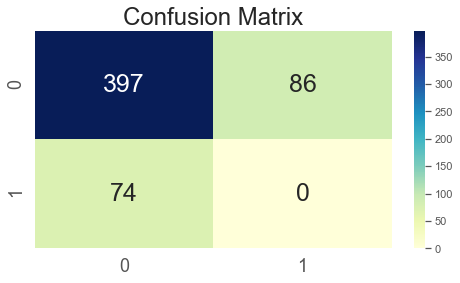

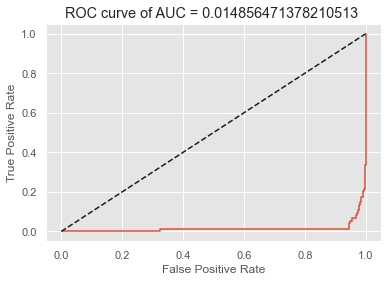

--> An AUC value of 0.014856471378210513 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is valid and PSD
Accuracy = 30.8188% (172/557) (classification)
--> The total of 557 predicted with only 83 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 12
Actual label is False while we predicted True - False Positive 412
Actual label is True while we predicted False - False Negative 62
Actual label is False while we predicted False - True Negatve 71

--> 424 positive outcomes predicted
--> 133 negative outcomes predicted
--> An accuracy of 14.9 % was achieved
--> Sensitity of 0.16 was achieved
--> Specificity of 0.15 was achieved 
--> 0.76 rate of positive prediction
--> 0.24 rate of negative prediction
--> 0.84 false negative rate was achieved
--> 0.85 false positve rate (fallout) was achieved
--> Negative predictive value of 0.53
--> Recall value 0f 0.16 achieved
--> The precision vaue of 0

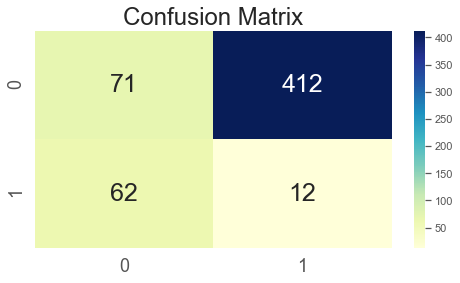

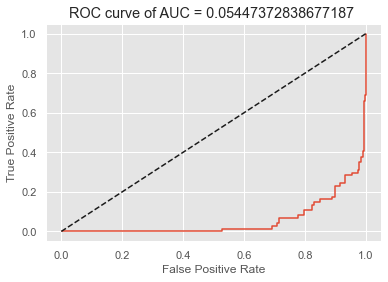

--> An AUC value of 0.05447372838677187 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is valid and PSD
Accuracy = 30.4233% (169/557) (classification)
--> The total of 557 predicted with only 60 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 2
Actual label is False while we predicted True - False Positive 425
Actual label is True while we predicted False - False Negative 72
Actual label is False while we predicted False - True Negatve 58

--> 427 positive outcomes predicted
--> 130 negative outcomes predicted
--> An accuracy of 10.77 % was achieved
--> Sensitity of 0.03 was achieved
--> Specificity of 0.12 was achieved 
--> 0.77 rate of positive prediction
--> 0.23 rate of negative prediction
--> 0.97 false negative rate was achieved
--> 0.88 false positve rate (fallout) was achieved
--> Negative predictive value of 0.45
--> Recall value 0f 0.03 achieved
--> The precision vaue of 0.

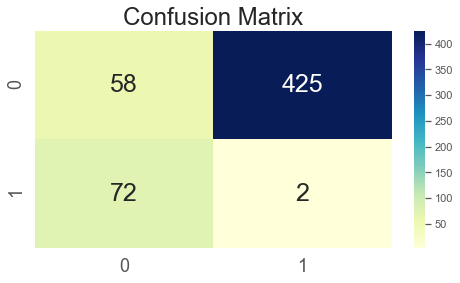

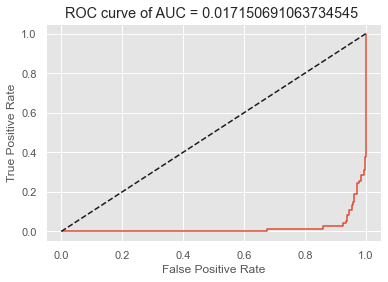

--> An AUC value of 0.017150691063734545 achieved


In [33]:
Exp_2 = fitkernelmodel(xtr, xte, ytr, yte, kernel, params)

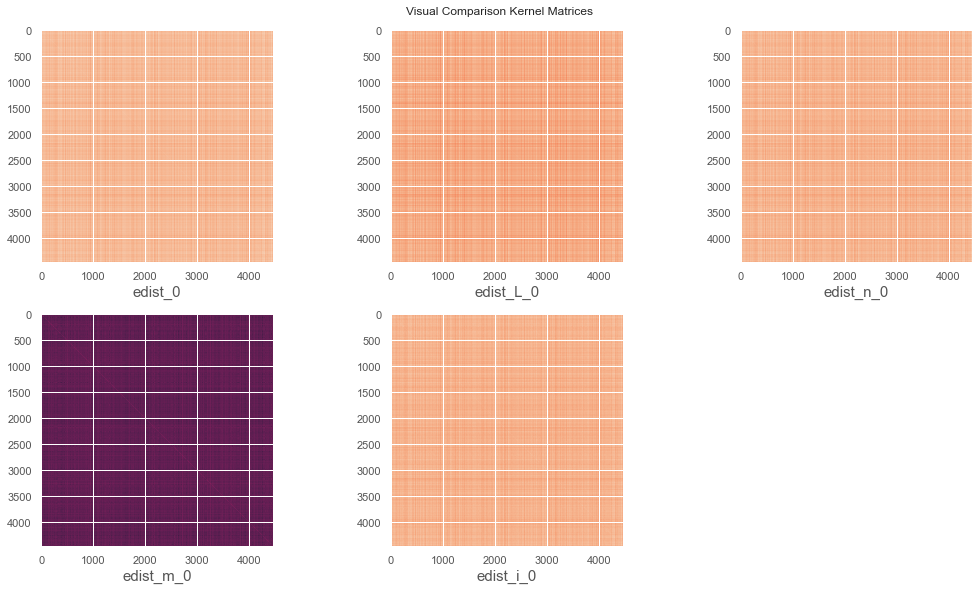

           Pos  Neg   Accu   Sen  Spec   RPP   RNP  Miss  Fall   NPV  Recall  \
edist_0      0  557  86.71  0.00  1.00  0.00  1.00  1.00  0.00  0.87    0.00   
edist_L_0   83  474  79.71  0.30  0.87  0.15  0.85  0.70  0.13  0.89    0.30   
edist_n_0   86  471  71.27  0.00  0.82  0.15  0.85  1.00  0.18  0.84    0.00   
edist_m_0  424  133  14.90  0.16  0.15  0.76  0.24  0.84  0.85  0.53    0.16   
edist_i_0  427  130  10.77  0.03  0.12  0.77  0.23  0.97  0.88  0.45    0.03   

           Precision  Fscore  
edist_0         0.00    0.00  
edist_L_0       0.27    0.28  
edist_n_0       0.00    0.00  
edist_m_0       0.03    0.05  
edist_i_0       0.00    0.00  
          train_kernel_time test_kernel_time diag_Dominance is_PSD num_Of_SV  \
edist_0             5429.48           629.81          False   True      1189   
edist_L_0           5275.31           604.61          False   True      1195   
edist_n_0           4720.84          540.578          False   True      1188   
edist_m_0    

In [34]:
Perf_2, Analysisdf_2 = Analyse_Results(Exp_2)

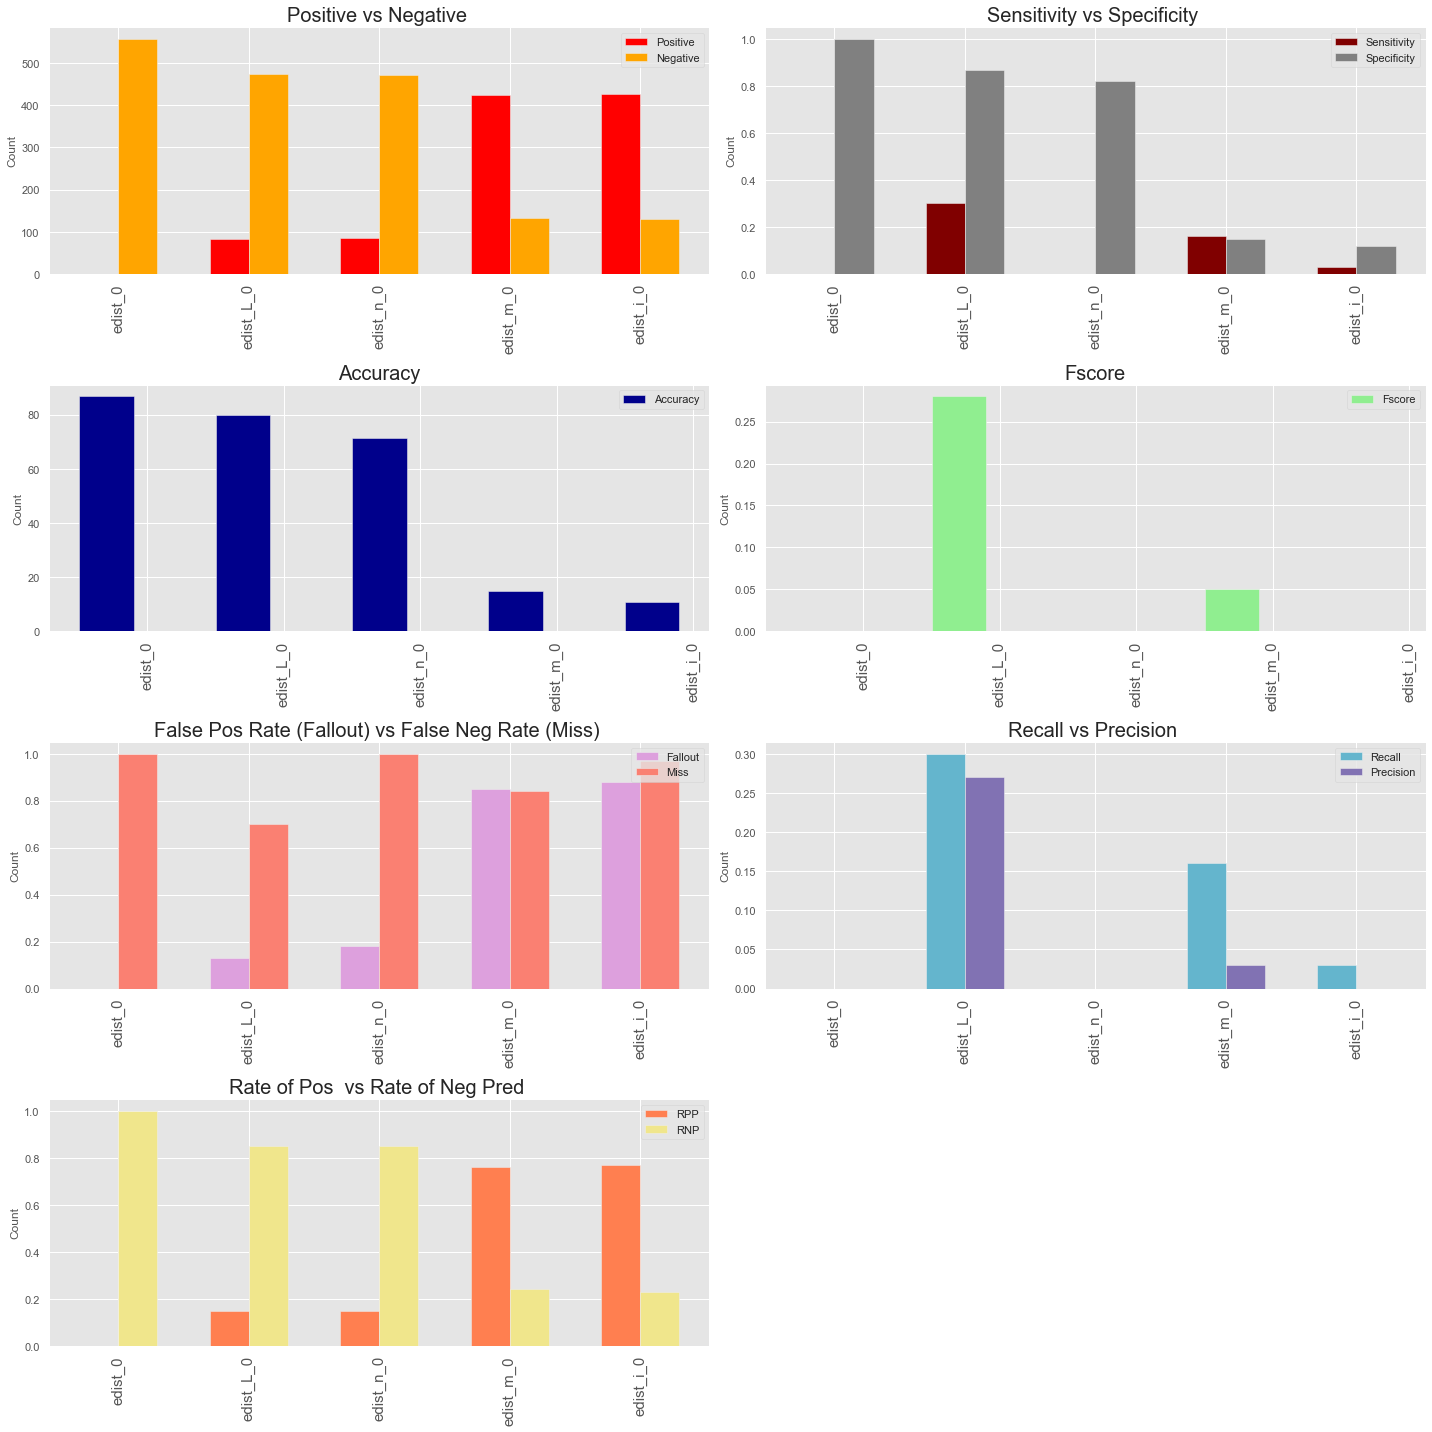

In [35]:
plotResult(Perf_2)

In [36]:
kernel = ['Aedist','Aedist_L','Aedist_n','Aedist_m','Aedist_i']

In [37]:
#Set Kernel parameter
params = {}
params['Aedist']   = [1]
params['Aedist_L'] = [1]
params['Aedist_i'] = [1]
params['Aedist_m'] = [1]
params['Aedist_n'] = [1]

The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall value 0f 0.0 achieved
--> The precision vaue of

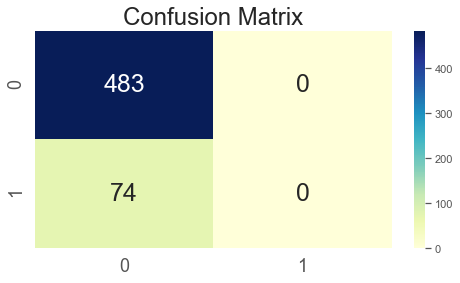

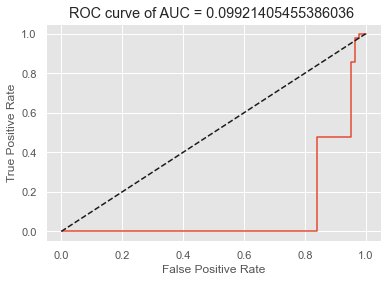

--> An AUC value of 0.09921405455386036 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recal

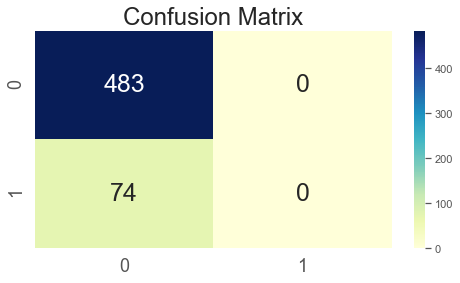

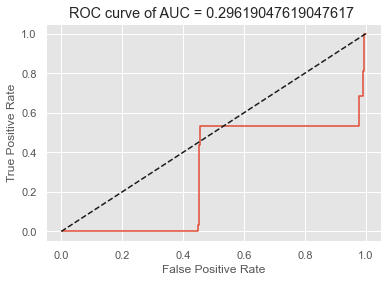

--> An AUC value of 0.29619047619047617 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.5827% (482/557) (classification)
--> The total of 557 predicted with only 482 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 1
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 482

Fscore cannot be calculated as denominator is 0
--> 1 positive outcomes predicted
--> 556 negative outcomes predicted
--> An accuracy of 86.54 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall value 0f 0.0 achieved
--> The precision vaue 

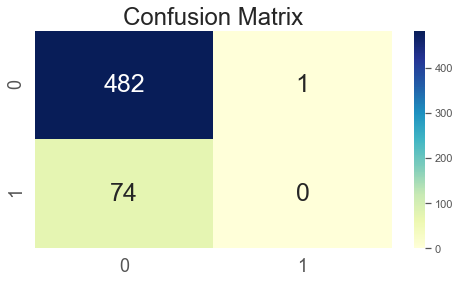

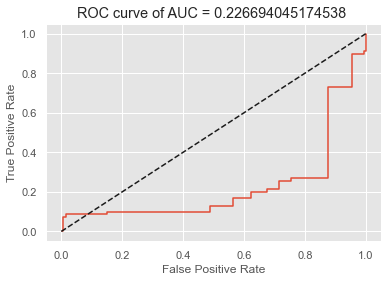

--> An AUC value of 0.226694045174538 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall 

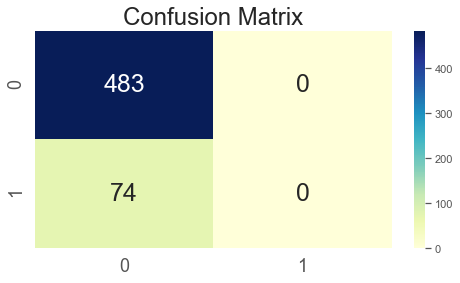

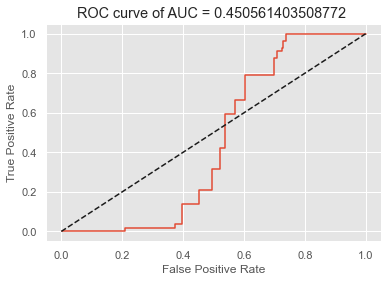

--> An AUC value of 0.450561403508772 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.5827% (482/557) (classification)
--> The total of 557 predicted with only 482 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 1
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 482

Fscore cannot be calculated as denominator is 0
--> 1 positive outcomes predicted
--> 556 negative outcomes predicted
--> An accuracy of 86.54 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall value 0f 0.0 achieved
--> The precision vaue of

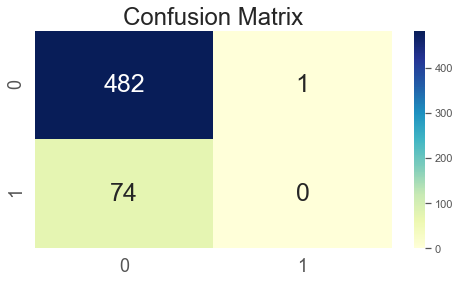

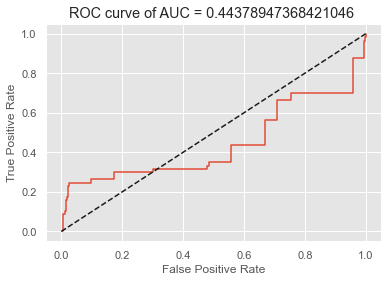

--> An AUC value of 0.44378947368421046 achieved


In [38]:
Exp_3 = fitkernelmodel(xtr, xte, ytr, yte, kernel, params)

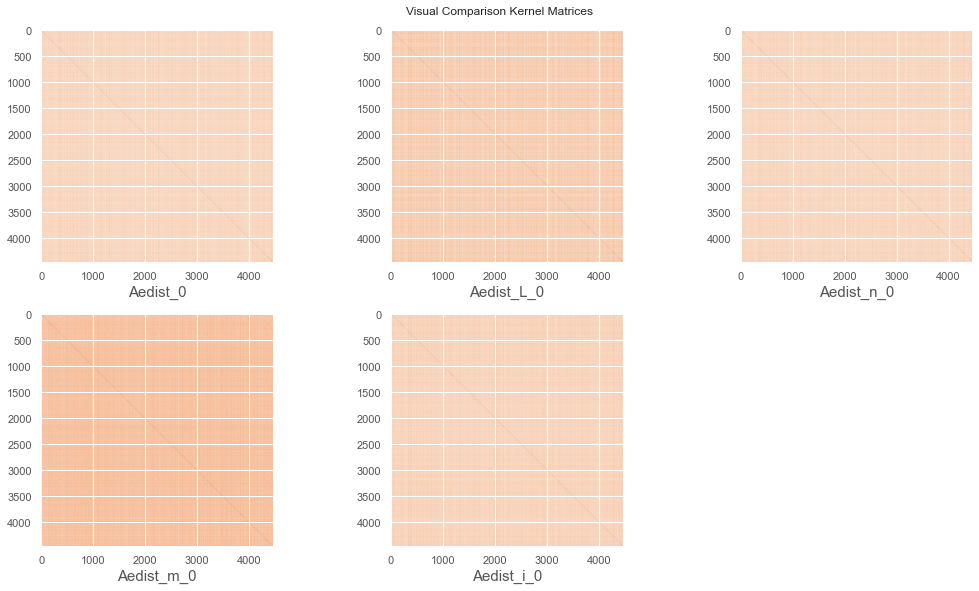

            Pos  Neg   Accu  Sen  Spec  RPP  RNP  Miss  Fall   NPV  Recall  \
Aedist_0      0  557  86.71  0.0   1.0  0.0  1.0   1.0   0.0  0.87     0.0   
Aedist_L_0    0  557  86.71  0.0   1.0  0.0  1.0   1.0   0.0  0.87     0.0   
Aedist_n_0    1  556  86.54  0.0   1.0  0.0  1.0   1.0   0.0  0.87     0.0   
Aedist_m_0    0  557  86.71  0.0   1.0  0.0  1.0   1.0   0.0  0.87     0.0   
Aedist_i_0    1  556  86.54  0.0   1.0  0.0  1.0   1.0   0.0  0.87     0.0   

            Precision  Fscore  
Aedist_0          0.0       0  
Aedist_L_0        0.0       0  
Aedist_n_0        0.0       0  
Aedist_m_0        0.0       0  
Aedist_i_0        0.0       0  
           train_kernel_time test_kernel_time diag_Dominance is_PSD num_Of_SV  \
Aedist_0             4586.25          555.276          False   True         2   
Aedist_L_0           4633.88           548.24          False   True         2   
Aedist_n_0           4588.08          554.532          False   True         2   
Aedist_m_0     

In [39]:
Perf_3, Analysisdf_3 = Analyse_Results(Exp_3)

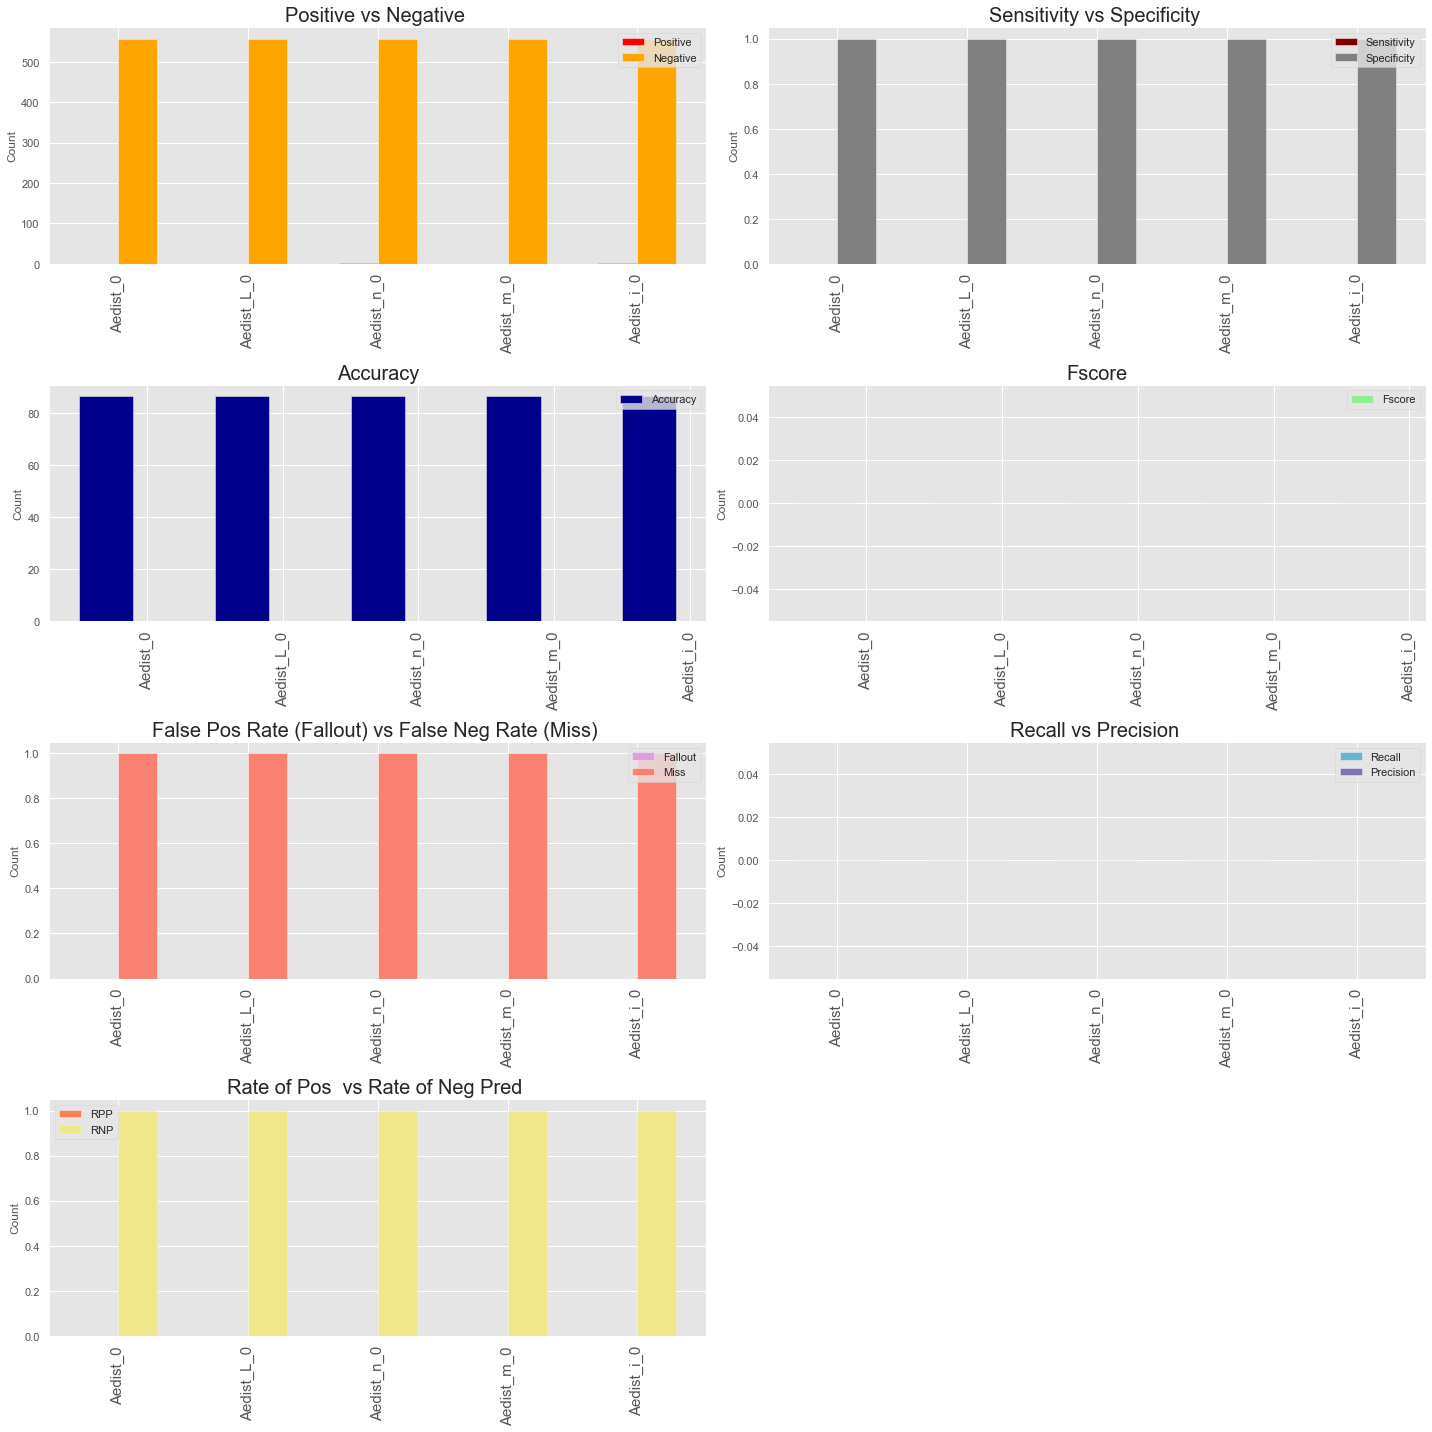

In [40]:
plotResult(Perf_3)

In [41]:
kernel = ['Geditdist','Geditdist_Levenshtein','Geditdist_norm_intersect','Geditdist_norm_max','Geditdist_norm']

In [42]:
#Set Kernel parameter
params = {}
params['Geditdist']                = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Geditdist_Levenshtein']    = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Geditdist_norm_intersect'] = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Geditdist_norm_max']       = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Geditdist_norm']           = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]

The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall value 0f 0.0 achieved
--> The precision vaue of

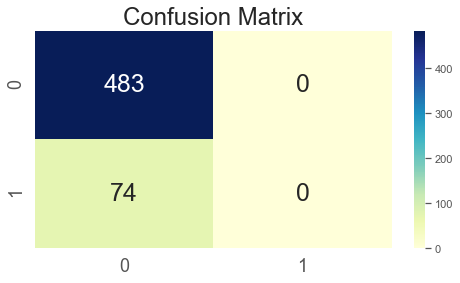

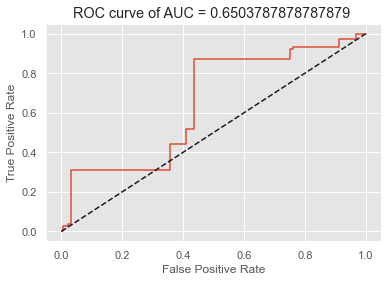

--> An AUC value of 0.6503787878787879 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall

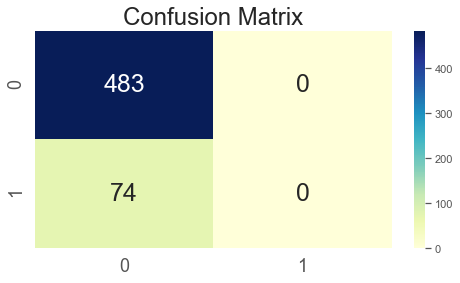

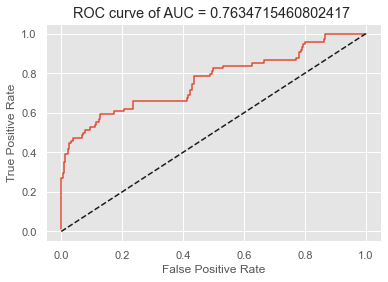

--> An AUC value of 0.7634715460802417 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall

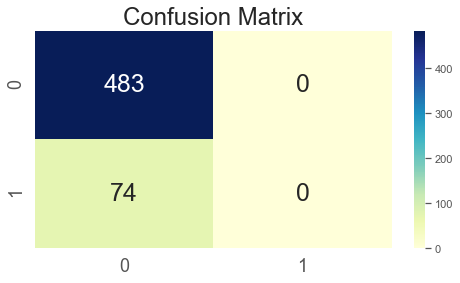

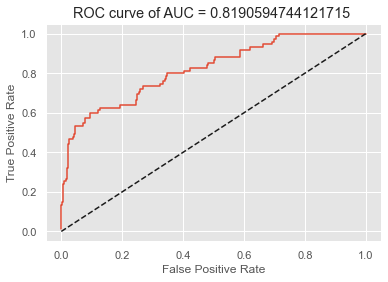

--> An AUC value of 0.8190594744121715 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 13.2855% (74/557) (classification)
--> The total of 557 predicted with only 74 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 74
Actual label is False while we predicted True - False Positive 483
Actual label is True while we predicted False - False Negative 0
Actual label is False while we predicted False - True Negatve 0

No Negative outcomes predicted
Negative predicted value set to 0
--> 557 positive outcomes predicted
--> 0 negative outcomes predicted
--> An accuracy of 13.29 % was achieved
--> Sensitity of 1.0 was achieved
--> Specificity of 0.0 was achieved 
--> 1.0 rate of positive prediction
--> 0.0 rate of negative prediction
--> 0.0 false negative rate was achieved
--> 1.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0
--> Recall value 0f 1.0 achieved
--> The prec

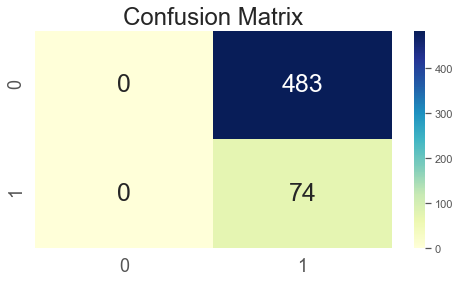

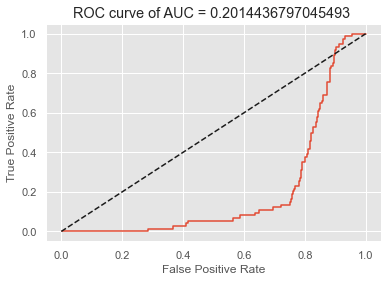

--> An AUC value of 0.2014436797045493 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is not PSD
Accuracy = 85.0008% (473/557) (classification)
--> The total of 557 predicted with only 496 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 13
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 61
Actual label is False while we predicted False - True Negatve 483

--> 13 positive outcomes predicted
--> 544 negative outcomes predicted
--> An accuracy of 89.05 % was achieved
--> Sensitity of 0.18 was achieved
--> Specificity of 1.0 was achieved 
--> 0.02 rate of positive prediction
--> 0.98 rate of negative prediction
--> 0.82 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.89
--> Recall value 0f 0.18 achieved
--> The precision vaue of 1.0 achieve

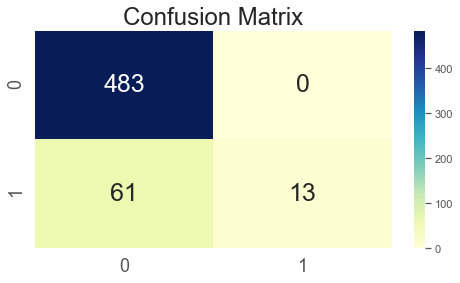

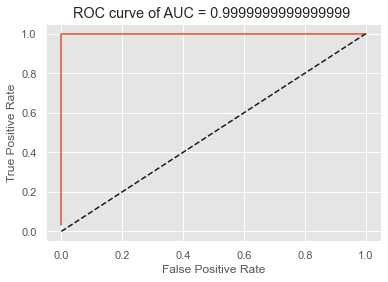

--> An AUC value of 0.9999999999999999 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is not PSD
Accuracy = 85.0008% (473/557) (classification)
--> The total of 557 predicted with only 496 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 13
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 61
Actual label is False while we predicted False - True Negatve 483

--> 13 positive outcomes predicted
--> 544 negative outcomes predicted
--> An accuracy of 89.05 % was achieved
--> Sensitity of 0.18 was achieved
--> Specificity of 1.0 was achieved 
--> 0.02 rate of positive prediction
--> 0.98 rate of negative prediction
--> 0.82 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.89
--> Recall value 0f 0.18 achieved
--> The precision vaue of 1.0 achieve

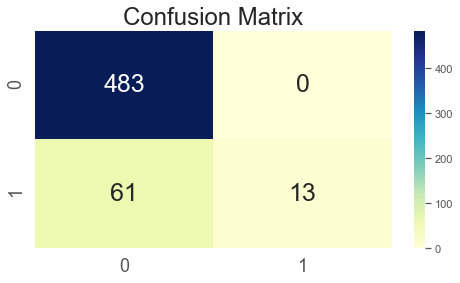

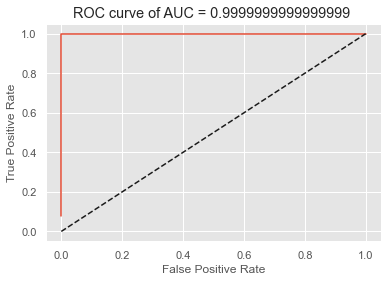

--> An AUC value of 0.9999999999999999 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recall

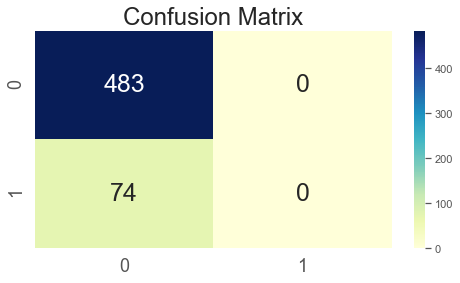

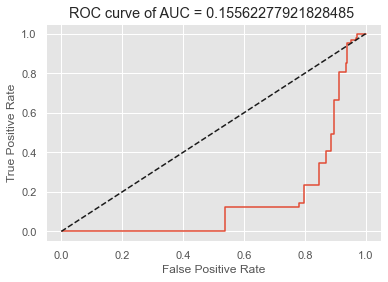

--> An AUC value of 0.15562277921828485 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recal

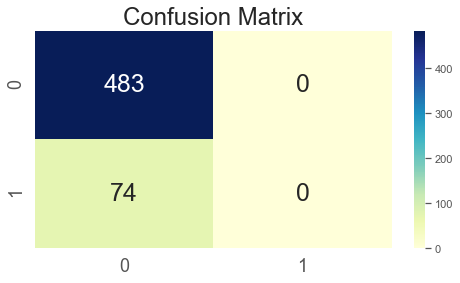

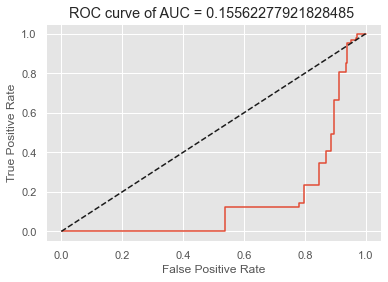

--> An AUC value of 0.15562277921828485 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 86.7145% (483/557) (classification)
--> The total of 557 predicted with only 483 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 0
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 74
Actual label is False while we predicted False - True Negatve 483

No True positives or False positives predicted
Fscore cannot be calculated as denominator is 0
--> 0 positive outcomes predicted
--> 557 negative outcomes predicted
--> An accuracy of 86.71 % was achieved
--> Sensitity of 0.0 was achieved
--> Specificity of 1.0 was achieved 
--> 0.0 rate of positive prediction
--> 1.0 rate of negative prediction
--> 1.0 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.87
--> Recal

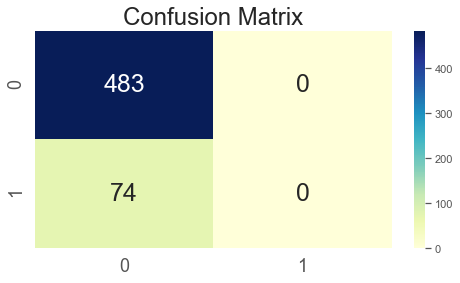

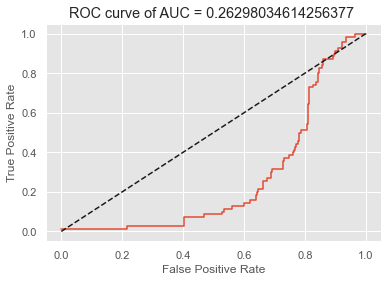

--> An AUC value of 0.26298034614256377 achieved
The matrix is not diagonally dominant
--> Kernel is valid and PSD
Accuracy = 13.5491% (75/557) (classification)
--> The total of 557 predicted with only 76 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 74
Actual label is False while we predicted True - False Positive 481
Actual label is True while we predicted False - False Negative 0
Actual label is False while we predicted False - True Negatve 2

--> 555 positive outcomes predicted
--> 2 negative outcomes predicted
--> An accuracy of 13.64 % was achieved
--> Sensitity of 1.0 was achieved
--> Specificity of 0.0 was achieved 
--> 1.0 rate of positive prediction
--> 0.0 rate of negative prediction
--> 0.0 false negative rate was achieved
--> 1.0 false positve rate (fallout) was achieved
--> Negative predictive value of 1.0
--> Recall value 0f 1.0 achieved
--> The precision vaue of 0.13 achieved
--> An Fscore of 0.23 achieved


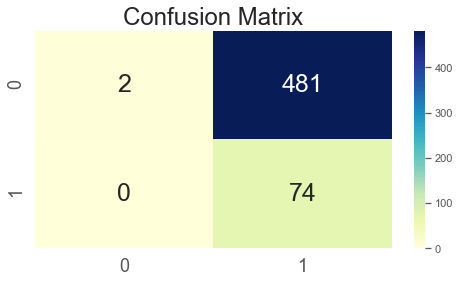

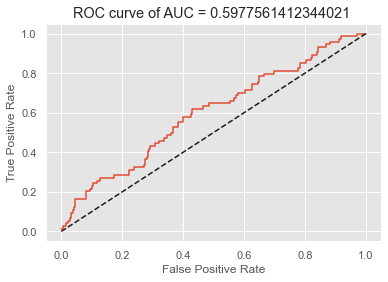

--> An AUC value of 0.5977561412344021 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is not PSD
Accuracy = 85.0008% (473/557) (classification)
--> The total of 557 predicted with only 496 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 13
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 61
Actual label is False while we predicted False - True Negatve 483

--> 13 positive outcomes predicted
--> 544 negative outcomes predicted
--> An accuracy of 89.05 % was achieved
--> Sensitity of 0.18 was achieved
--> Specificity of 1.0 was achieved 
--> 0.02 rate of positive prediction
--> 0.98 rate of negative prediction
--> 0.82 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.89
--> Recall value 0f 0.18 achieved
--> The precision vaue of 1.0 achieve

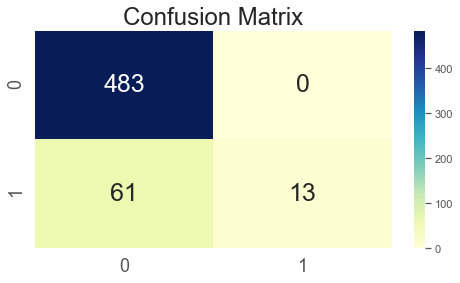

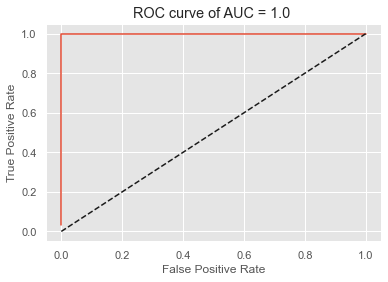

--> An AUC value of 1.0 achieved
The matrix is not diagonally dominant
The matrix is diagonally dominant
--> Kernel is not PSD
Accuracy = 85.0008% (473/557) (classification)
--> The total of 557 predicted with only 496 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 13
Actual label is False while we predicted True - False Positive 0
Actual label is True while we predicted False - False Negative 61
Actual label is False while we predicted False - True Negatve 483

--> 13 positive outcomes predicted
--> 544 negative outcomes predicted
--> An accuracy of 89.05 % was achieved
--> Sensitity of 0.18 was achieved
--> Specificity of 1.0 was achieved 
--> 0.02 rate of positive prediction
--> 0.98 rate of negative prediction
--> 0.82 false negative rate was achieved
--> 0.0 false positve rate (fallout) was achieved
--> Negative predictive value of 0.89
--> Recall value 0f 0.18 achieved
--> The precision vaue of 1.0 achieved
--> An Fscore

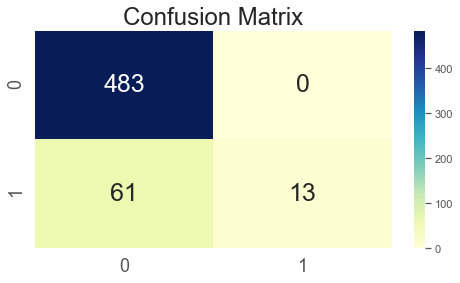

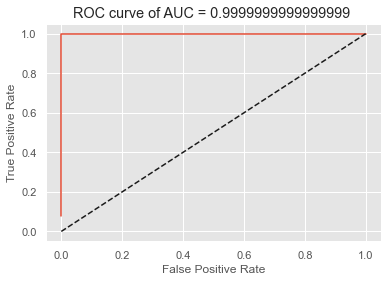

--> An AUC value of 0.9999999999999999 achieved


In [ ]:
Exp_4 = fitkernelmodel(xtr, xte, ytr, yte, kernel, params)

In [ ]:
Perf_4, Analysisdf_4 = Analyse_Results(Exp_4)

In [ ]:
plotResult(Perf_4)

In [ ]:
kernel = ['Gedist','Gedist_Levenshtein','Gedist_norm_intersect','Gedist_norm_max','Gedist_norm']

In [ ]:
#Set Kernel parameter
params = {}
params['Gedist']                = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Gedist_Levenshtein']    = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Gedist_norm_intersect'] = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Gedist_norm_max']       = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]
params['Gedist_norm']           = [0.00000125,0.0000125,0.0001,0.0125,12.5,125]

In [ ]:
Exp_5 = fitkernelmodel(xtr, xte, ytr, yte, kernel, params)

In [ ]:
Perf_5, Analysisdf_5 = Analyse_Results(Exp_5)

In [ ]:
plotResult(Perf_5)